In [1]:
import pandas as pd
import geopandas as gp
import numpy as np
from statistics import mean, median
import matplotlib.pyplot as plt
import os
from shapely.geometry import Polygon, MultiPolygon, shape, Point

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# VEST WI 2020

## VEST's Documentation File

Election results and precinct shapefile from Wisconsin State Legislature Open Data Portal (https://data-ltsb.opendata.arcgis.com/)  
  
The following wards had been added due to annexations prior to the 2020 general election. They appear in the 2020 election results but not in the LTSB 2020 shapefile. They were added using the 2021 municipal wards shapefile. Any associated election results were redistributed based on the number of registered voters by ward as of 11/01/2020.  
  
Chippewa: Chippewa Falls 5A  
Dane: DeForest 23  
Eau Claire: Eau Claire 80, 81  
Kenosha: Kenosha 116  
Manitowoc: Manitowoc 32  
Sauk: Prairie du Sac 5  
Wood: Marshfield 25, 26; Wisconsin Rapids 26, 27, 29  
  
G20PREDBID - Joseph R. Biden (Democratic Party)  
G20PRERTRU - Donald J. Trump (Republican Party)  
G20PRELJOR - Jo Jorgensen (Libertarian Party)  
G20PRECBLA - Don Blankenship (Constitution Party)  
G20PREICAR - Brain Carroll (Independent)  
G20PREOHAW - Howie Hawkins (Independent write-in)  
G20PREOWES - Kanye West (Independent write-in)  
G20PREOLAR - Gloria La Riva (Independent write-in)  
G20PREOCHA - Mark Charles (Independent write-in)  
G20PREOSIM - Jade Simmons (Independent write-in)  
G20PREOWEL - Kasey Wells (Independent write-in)  
G20PREOBOD - R19 Boddie (Independent write-in)  
G20PREOWRI - Other Write-in Votes  

In [2]:
#Read in the final shapefile from VEST
vest_shp = gp.read_file('./raw-from-source/VEST/wi_2020/wi_2020.shp')

In [3]:
vest_shp.head(1)

,GEOID,CNTY_FIPS,CNTY_NAME,COUSUBFP,MCD_FIPS,MCD_NAME,CTV,LABEL,DISTRICT,ASM,SEN,CON,G20PREDBID,G20PRERTRU,G20PRELJOR,G20PRECBLA,G20PREICAR,G20PREOHAW,G20PREOWES,G20PREOLAR,G20PREOCHA,G20PREOSIM,G20PREOWEL,G20PREOBOD,G20PREOWRI,geometry
0,55001002750001,55001,Adams,00275,5500100275,Adams,C,Adams - C 0001,41,41,14,3,109,154,3,1,0,0,0,0,0,0,0,0,1,"POLYGON ((-89.82780 43.96684, -89.82780 43.966..."


In [4]:
#Read in election results
election_results = gp.read_file('./raw-from-source/WSL/2012-2020_Election_Data_with_2020_Wards/_2012_2020_Election_Datawith2020_Wards.shp')

In [5]:
election_results.head(1)

,FID,GEOID,CNTY_FIPS,CNTY_NAME,COUSUBFP,MCD_FIPS,MCD_NAME,CTV,LABEL,LSAD,NAME,DISTRICT,ASM,SEN,CON,STR_WARDS,PERSONS,PERSONS18,WHITE,BLACK,HISPANIC,ASIAN,AMINDIAN,PISLAND,OTHER,OTHERMLT,WHITE18,BLACK18,HISPANIC18,ASIAN18,AMINDIAN18,PISLAND18,OTHER18,OTHERMLT18,CDATOT20,CDADEM20,CDAREP20,CDAIND20,CDASCT20,PRETOT20,PREDEM20,PREREP20,PRECON20,PREIND20,PREIND220,PREIND320,PREIND420,PREIND520,PREIND620,PREIND720,PREIND820,PREIND920,PRESCT20,USHTOT20,USHDEM20,USHREP20,USHIND20,USHSCT20,WSATOT20,WSADEM20,WSAREP20,WSACON20,WSAIND20,WSASCT20,WSSTOT20,WSSDEM20,WSSREP20,WSSIND20,WSSSCT20,GOVTOT18,GOVREP18,GOVDEM18,GOVLIB18,GOVIND18,GOVIND218,GOVIND318,GOVREP218,GOVDEM218,GOVCON18,GOVDEM318,GOVIND418,GOVIND518,GOVDEM418,GOVDEM518,GOVSCT18,SOSTOT18,SOSREP18,SOSDEM18,SOSGRN18,SOSSCT18,TRSTOT18,TRSREP18,TRSDEM18,TRSCON18,TRSSCT18,USHTOT18,USHREP18,USHDEM18,USHIND18,USHIND218,USHDEM218,USHSCT18,USSTOT18,USSREP18,USSDEM18,USSIND18,USSSCT18,USSIND218,WAGTOT18,WAGREP18,WAGDEM18,WAGCON18,WAGSCT18,WSATOT18,WSAREP18,WSADEM18,WSAIND18,WSALIB18,WSASCT18,WSACON18,WSAREP218,WSSTOT18,WSSREP18,WSSDEM18,WSSSCT18,WSSIND18,CDATOT16,CDADEM16,CDADEM216,CDAREP16,CDAIND16,CDASCT16,PRETOT16,PREDEM16,PREREP16,PREGRN16,PRELIB16,PRECON16,PREIND16,PREIND216,PREIND316,PREIND416,PREIND516,PREIND616,PREIND716,PREIND816,PREIND916,PREIND1016,PREIND1116,PRESCT16,USHTOT16,USHDEM16,USHDEM216,USHREP16,USHGRN16,USHLIB16,USHIND16,USHSCT16,USSTOT16,USSDEM16,USSREP16,USSREP216,USSLIB16,USSSCT16,WSATOT16,WSADEM16,WSAREP16,WSALIB16,WSAIND16,WSASCT16,WSSTOT16,WSSDEM16,WSSREP16,WSSIND16,WSSSCT16,GOVTOT14,GOVDEM14,GOVREP14,GOVIND14,GOVIND214,GOVIND314,GOVREP214,GOVCON14,GOVIND414,GOVIND514,GOVREP314,GOVSCT14,SOSTOT14,SOSDEM14,SOSREP14,SOSCON14,SOSIND14,SOSSCT14,TRSTOT14,TRSDEM14,TRSREP14,TRSCON14,TRSIND14,TRSIND214,TRSSCT14,USHTOT14,USHDEM14,USHREP14,USHIND14,USHREP214,USHIND214,USHSCT14,WAGTOT14,WAGDEM14,WAGREP14,WAGIND14,WAGSCT14,WSATOT14,WSADEM14,WSAREP14,WSAIND14,WSAREP214,WSASCT14,WSSTOT14,WSSDEM14,WSSREP14,WSSIND14,WSSSCT14,CDATOT12,CDADEM12,CDADEM212,CDAREP12,CDAIND12,CDASCT12,GOVTOT12,GOVDEM12,GOVREP12,GOVIND12,GOVSCT12,PRETOT12,PREDEM12,PREREP12,PRECON12,PREIND12,PREIND212,PREIND312,PREIND412,PREIND512,PREIND612,PRESCT12,USHTOT12,USHDEM12,USHREP12,USHIND12,USHSCT12,USSTOT12,USSDEM12,USSREP12,USSCON12,USSIND12,USSIND212,USSIND312,USSSCT12,WSATOT12,WSADEM12,WSADEM212,WSAREP12,WSAREP212,WSAIND12,WSAIND212,WSASCT12,WSSTOT12,WSSDEM12,WSSREP12,WSSREP212,WSSCON12,WSSIND12,WSSSCT12,WSSAME12,Shape_STAr,Shape_STLe,SHAPE_Leng,SHAPE_Area,geometry
0,1,55001002750001,55001,Adams,00275,5500100275,Adams,C,Adams - C 0001,25,Adams,41,41,14,3,0001,661,484,620,17,15,1,5,0,0,3,463,9,8,1,3,0,0,0,190.0,0.0,0.0,186.0,4.0,268.0,109.0,154.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,256.0,116.0,140.0,0.0,0.0,256.0,101.0,136.0,0.0,19.0,0.0,258.0,100.0,157.0,0.0,1.0,228.0,120.0,99.0,3.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,218.0,110.0,108.0,0.0,0.0,217.0,106.0,102.0,9.0,0.0,220.0,100.0,120.0,0.0,0.0,0.0,0.0,223.0,103.0,119.0,0.0,1.0,0.0,222.0,114.0,102.0,6.0,0.0,220.0,125.0,95.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,183.0,0.0,0.0,0.0,180.0,3.0,258.0,110.0,127.0,3.0,6.0,3.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,164.0,162.0,0.0,0.0,0.0,0.0,0.0,2.0,245.0,111.0,116.0,0.0,18.0,0.0,217.0,0.0,126.0,0.0,91.0,0.0,227.0,121.0,106.0,0.0,0.0,193.0,101.0,85.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,106.0,65.0,4.0,5.0,0.0,174.0,91.0,70.0,3.0,6.0,4.0,0.0,179.0,109.0,70.0,0.0,0.0,0.0,0.0,182.0,94.0,81.0,7.0,0.0,181.0,94.0,87.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,193.0,0.0,0.0,0.0,191.0,2.0,216.0,104.0,95.0,15.0,2.0,272.0,168.0,101.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,237.0,150.0,86.0,0.0,1.0,262.0,148.0,99.0,0.0,11.0,3.0,0.0,1.0,232.0,140.0,0.0,92.0,0.0,0.0,0.0,0.0,230.0,137.0,92.0,0.0,0.0,0.0,1.0,0.0,4.821614e+07,40252.052527,17048.576779,8.651835e+06,"POLYGON ((-9999584.655 5460311.612, -9999584.6..."


In [6]:
col_dict = {'PREDEM20':'G20PREDBID','PREREP20':'G20PRERTRU','PREIND20':'G20PRELJOR','PRECON20': 'G20PRECBLA',
            'PREIND220':'G20PREICAR','PREIND620':'G20PREOHAW','PREIND820':'G20PREOWES',
            'PREIND720':'G20PREOLAR','PREIND920':'G20PREOCHA','PREIND420':'G20PREOSIM',
            'PREIND320':'G20PREOWEL','PREIND520':'G20PREOBOD','PRESCT20':'G20PREOWRI'}

election_results = election_results.rename(col_dict, axis=1)

## Compare Election Results

In [7]:
races = [x for x in vest_shp.columns if 'G20' in x]
races

['G20PREDBID',
 'G20PRERTRU',
 'G20PRELJOR',
 'G20PRECBLA',
 'G20PREICAR',
 'G20PREOHAW',
 'G20PREOWES',
 'G20PREOLAR',
 'G20PREOCHA',
 'G20PREOSIM',
 'G20PREOWEL',
 'G20PREOBOD',
 'G20PREOWRI']

### Compare Vote Totals

In [8]:
sum_var_1 = 0
sum_var_2 = 0
for i in races:
    sum_var_1 += np.sum(vest_shp[i])
    sum_var_2 += np.sum(election_results[i])
print(sum_var_1)
print(sum_var_2)

3298041
3298041.0


### Compare Race Totals

In [9]:
def statewide_totals_check(partner_df,source_df,column_list):
    print("***Statewide Totals Check***")
    for race in column_list:
        if (sum(partner_df[race])- source_df[race].sum() != 0):
            print(race+" has a difference of "+str(sum(partner_df[race])-source_df[race].sum())+" votes")
            print("\tVEST: "+str(sum(partner_df[race]))+" votes")
            print("\tSOURCES: "+str(source_df[race].sum())+" votes")
        else:
            print(race + " is equal", "\tVEST / RDH: " + str(sum(partner_df[race])))

In [10]:
statewide_totals_check(vest_shp,election_results,races)

***Statewide Totals Check***
G20PREDBID is equal 	VEST / RDH: 1630866
G20PRERTRU is equal 	VEST / RDH: 1610184
G20PRELJOR is equal 	VEST / RDH: 38491
G20PRECBLA is equal 	VEST / RDH: 5146
G20PREICAR is equal 	VEST / RDH: 5259
G20PREOHAW is equal 	VEST / RDH: 1089
G20PREOWES is equal 	VEST / RDH: 411
G20PREOLAR is equal 	VEST / RDH: 110
G20PREOCHA is equal 	VEST / RDH: 52
G20PREOSIM is equal 	VEST / RDH: 36
G20PREOWEL is equal 	VEST / RDH: 25
G20PREOBOD is equal 	VEST / RDH: 5
G20PREOWRI is equal 	VEST / RDH: 6367


### Compare County Totals

In [11]:
def county_totals_check(partner_df,source_df,column_list,county_col,full_print=False):
    print("***Countywide Totals Check***")
    print("")
    diff_counties=[]
    for race in column_list:
        diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
        for val in diff[diff != 0].index.values.tolist():
            if val not in diff_counties:
                diff_counties.append(val)
        if len(diff[diff != 0]!=0):   
            print(race + " contains differences in these counties:")
            for val in diff[diff != 0].index.values.tolist():
                county_differences = diff[diff != 0]
                print("\t"+val+" has a difference of "+str(county_differences[val])+" votes")
                print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
                print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
        else:
            print(race + " is equal across all counties")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")

In [12]:
county_totals_check(vest_shp,election_results,races,'CNTY_FIPS')

***Countywide Totals Check***

G20PREDBID is equal across all counties
G20PRERTRU is equal across all counties
G20PRELJOR is equal across all counties
G20PRECBLA is equal across all counties
G20PREICAR is equal across all counties
G20PREOHAW is equal across all counties
G20PREOWES is equal across all counties
G20PREOLAR is equal across all counties
G20PREOCHA is equal across all counties
G20PREOSIM is equal across all counties
G20PREOWEL is equal across all counties
G20PREOBOD is equal across all counties
G20PREOWRI is equal across all counties


## Attempt Join

In [13]:
join_attempt_one = pd.merge(election_results,vest_shp,how="outer",on="GEOID",indicator=True)
print(join_attempt_one["_merge"].value_counts())

both          7077
right_only      13
left_only        1
Name: _merge, dtype: int64


In [14]:
join_attempt_one[join_attempt_one['_merge'] != 'both'][['CNTY_FIPS_x','LABEL_x','CNTY_FIPS_y','LABEL_y','GEOID']]

,CNTY_FIPS_x,LABEL_x,CNTY_FIPS_y,LABEL_y,GEOID
2459,55059,Kenosha - C 0016,NaN,NaN,55059392250016
7078,NaN,NaN,55059,Kenosha - C 0016,5505939225001
7079,NaN,NaN,55017,Chippewa Falls - C 005A,5501714575005a
7080,NaN,NaN,55025,DeForest - V 0023,55025193500023
7081,NaN,NaN,55035,Eau Claire - C 0080,55035223000080
7082,NaN,NaN,55035,Eau Claire - C 0081,55035223000081
7083,NaN,NaN,55059,Kenosha - C 0116,55059392250116
7084,NaN,NaN,55071,Manitowoc - C 0032,55071485000032
7085,NaN,NaN,55111,Prairie du Sac - V 0005,55111651000005
7086,NaN,NaN,55141,Marshfield - C 0025,55141496750025


In [15]:
wi_dict = {'55059392250016': '5505939225001'}

In [16]:
#Use the dictionary to change the names
election_results["GEOID"]=election_results["GEOID"].map(wi_dict).fillna(election_results["GEOID"])

## Add wards
VEST- The following wards had been added due to annexations prior to the 2020 general election. They appear in the 2020 election results but not in the LTSB 2020 shapefile. They were added using the 2021 municipal wards shapefile. Any associated election results were redistributed based on the number of registered voters by ward as of 11/01/2020.  
  
Chippewa: Chippewa Falls 5A  
Dane: DeForest 23  
Eau Claire: Eau Claire 80, 81  
Kenosha: Kenosha 116  
Manitowoc: Manitowoc 32  
Sauk: Prairie du Sac 5  
Wood: Marshfield 25, 26; Wisconsin Rapids 26, 27, 29  

In [17]:
municipal_wards = gp.read_file('./raw-from-source/Municipal Wards/WI_Municipal_Wards_(March_2021)/WI_MunicipalWards_March2021.shp')

In [18]:
municipal_wards.head(1)

,FID,GEOID,CNTY_FIPS,CNTY_NAME,COUSUBFP,MCD_FIPS,MCD_NAME,CTV,WARD_FIPS,WARDID,SUPERID,SUPER_FIPS,ALDERID,ALDER_FIPS,CONTACT,DATE_SUB,SCHOOLID,NOTES,LABEL,Shape_STAr,Shape_STLe,SHAPE_Leng,SHAPE_Area,geometry
0,1,55001002750001,55001,Adams,00275,5500100275,Adams,C,55001002750001,0001,11,5500111,None,550010027501,AFAUST@NCWRPC.ORG,3/3/2021 8:10:42 AM,None,None,Adams - C 0001,4.821612e+07,40252.046229,17048.571955,8.651830e+06,"POLYGON ((-9999161.454 5459192.018, -9998456.2..."


In [19]:
wards = ['5501714575005a','55025193500023','55035223000080','55035223000081','55059392250116','55071485000032','55111651000005','55141496750025','55141496750026','55141882000026','55141882000027','55141882000029']

missing_wards = municipal_wards.loc[municipal_wards['GEOID'].isin(wards)]

In [20]:
election_results = pd.concat([election_results, missing_wards], axis=0)
election_results = election_results.fillna(0)

## Join Attempt 2

In [21]:
join_attempt_two = pd.merge(election_results,vest_shp,how="outer",on="GEOID",indicator=True)
print(join_attempt_two["_merge"].value_counts())

both          7090
left_only        0
right_only       0
Name: _merge, dtype: int64


In [22]:
join_attempt_two[join_attempt_two['_merge'] != 'both'][['CNTY_FIPS_x','LABEL_x','CNTY_FIPS_y','LABEL_y','GEOID']]

,CNTY_FIPS_x,LABEL_x,CNTY_FIPS_y,LABEL_y,GEOID


### Compare Precinct Votes

In [23]:
def precinct_votes_check(merged_df,column_list,vest_on_left,name_col,print_level=0):
    merged_df = merged_df.sort_values(by=[name_col],inplace=False)
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    for index,row in merged_df.iterrows():
        same = True
        for i in column_list:
            left_data = i + "_x"
            right_data = i + "_y"
            if ((row[left_data] is None) or (row[right_data] is None) or (np.isnan(row[right_data])or(np.isnan(row[left_data])))):
                print("FIX NaN value at: ", row[name_col])
                return;
            diff = abs(row[left_data]-row[right_data])
            if (diff>0):
                same = False
                diff_values.append(abs(diff))
                if (diff>max_diff):
                    max_diff = diff
            if(diff>print_level):
                if (vest_on_left):
                    print(i, "{:.>72}".format(row[name_col]), "(V)","{:.>5}".format(int(row[left_data]))," (S){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))                           
                else:
                    print(i, "{:.>72}".format(row[name_col]), "(S)","{:.>5}".format(int(row[left_data]))," (V){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))
        if(same != True):
            different_rows +=1
            diff_list.append(row[name_col])
        else:
            matching_rows +=1
    print("")
    print("There are ", len(merged_df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    print("")
    print("All precincts containing differences:")
    diff_list.sort()
    print(diff_list)

In [24]:
precinct_votes_check(join_attempt_two[join_attempt_two["_merge"]=="both"],races,False,'LABEL_y')

G20PREDBID ........................................................Kenosha - C 0001 (S) ..376  (V)..375 (D):    1
G20PREDBID ........................................................Kenosha - C 0016 (S) ..223  (V)..222 (D):    1
G20PREDBID ........................................................Kenosha - C 0116 (S) ....0  (V)....2 (D):   -2
G20PREDBID .....................................................Marshfield - C 0006 (S) ..361  (V)..307 (D):   54
G20PRERTRU .....................................................Marshfield - C 0006 (S) ..456  (V)..387 (D):   69
G20PRELJOR .....................................................Marshfield - C 0006 (S) ....8  (V)....6 (D):    2
G20PREDBID .....................................................Marshfield - C 0017 (S) ..156  (V)..182 (D):  -26
G20PRERTRU .....................................................Marshfield - C 0017 (S) ..197  (V)..230 (D):  -33
G20PRELJOR .....................................................Marshfield - C 0017 (S) 

## Precinct Vote Differences
Vote differences appear to be vote allocation done by VEST concerning the missing municipal wards.


# Precinct Shapefiles
## Documentation
Election results and precinct shapefile from Wisconsin State Legislature Open Data Portal (https://data-ltsb.opendata.arcgis.com/)

In [25]:
vest_shp = vest_shp.to_crs(3857)
election_results = election_results.to_crs(3857)

In [26]:
print(election_results.shape)
vest_shp.shape

(7090, 289)


(7090, 26)

<AxesSubplot:>

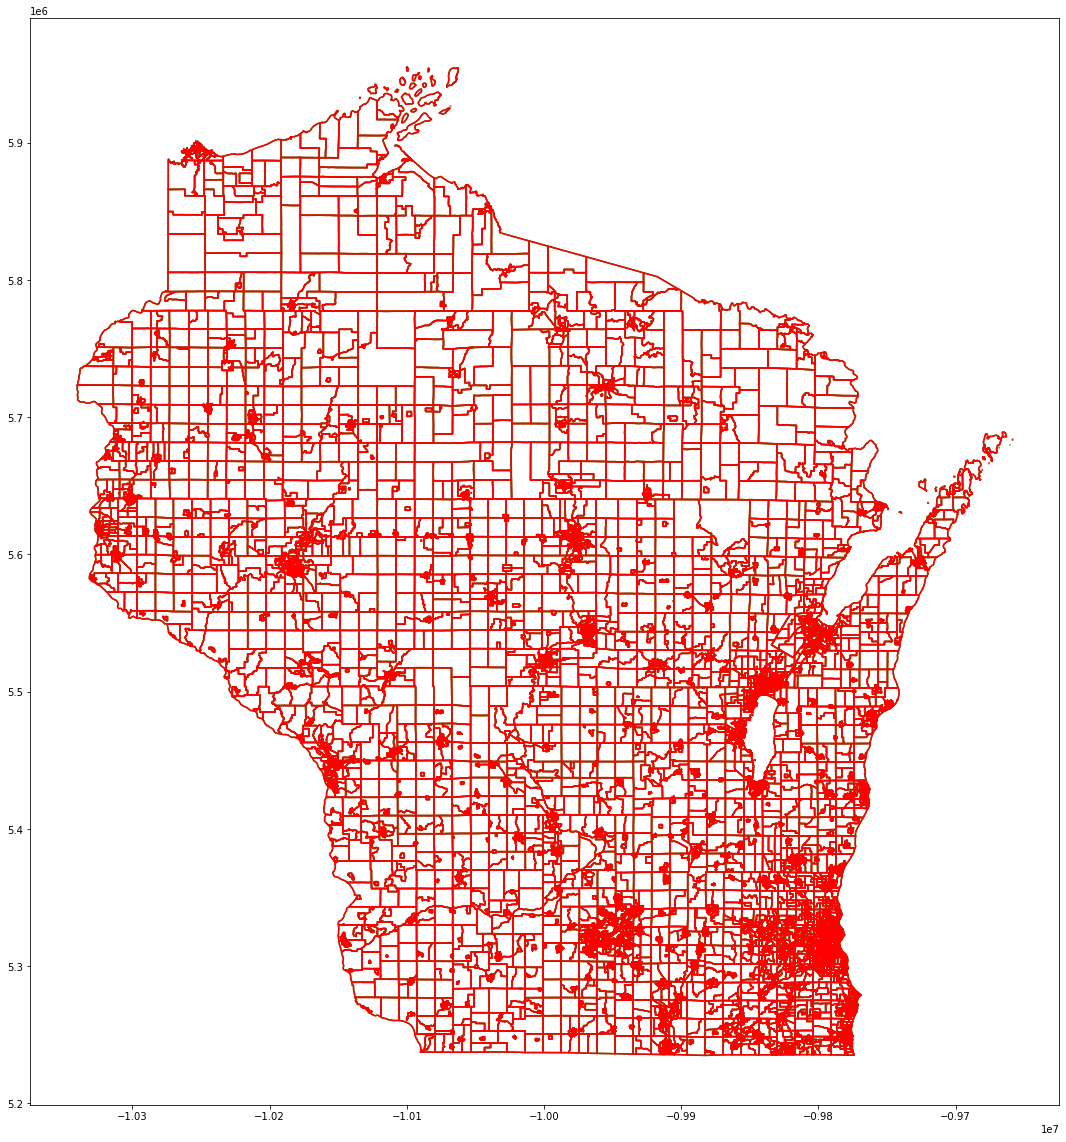

In [27]:
ax = election_results.boundary.plot(figsize=(20,20),color="green")
vest_shp.boundary.plot(figsize=(20,20),ax=ax,color="red")

In [28]:
final_merge = pd.merge(election_results,vest_shp,how="outer",on="GEOID",indicator="final_merge")
final_merge["final_merge"].value_counts()

both          7090
left_only        0
right_only       0
Name: final_merge, dtype: int64

In [29]:
both = final_merge[final_merge["final_merge"]=="both"]
vest_geoms = gp.GeoDataFrame(both,geometry="geometry_x")
source_geoms = gp.GeoDataFrame(both,geometry="geometry_y")
source_geoms = source_geoms.to_crs(3857)
vest_geoms = vest_geoms.to_crs(3857)
source_geoms["geometry_x"]=source_geoms.buffer(0)
vest_geoms["geometry_y"]=vest_geoms.buffer(0)
vals = source_geoms.geom_almost_equals(vest_geoms,decimal=0)
print(vals.value_counts())

True     6818
False     272
dtype: int64


In [30]:
count = 0
area_list = []
for i in range(0,len(source_geoms)):
    diff = source_geoms.iloc[[i]].symmetric_difference(vest_geoms.iloc[[i]])
    intersection = source_geoms.iloc[[i]].intersection(vest_geoms.iloc[[i]])
    area = float(diff.area/10e6)
    area_list.append(area)
    #print("Area is " + str(area))

    if (area > .5):
        count += 1
        name = source_geoms.iat[i,3]
        county = source_geoms.iat[i,1]
        
        print(str(count)+") For " + str(county) + '-' + str(name) + " difference in area is " + str(area))
        if (intersection.iloc[0].is_empty):
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            base.set_title(name)
        else:
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            intersection.plot(color="green",ax=base)
            base.set_title(name)

In [31]:
df = pd.DataFrame(area_list)
print(df.shape)

print(str(len(df[df[0]==0]))+" precincts w/ a difference of 0 km^2")
print(str(len(df[(df[0]<.1) & (df[0]>0)]))+ " precincts w/ a difference between 0 and 0.1 km^2")
print(str(len(df[(df[0]<.5) & (df[0]>=.1)]))+ " precincts w/ a difference between 0.1 and 0.5 km^2")
print(str(len(df[(df[0]<1) & (df[0]>=.5)]))+ " precincts w/ a difference between 0.5 and 1 km^2")
print(str(len(df[(df[0]<2) & (df[0]>=1)]))+ " precincts w/ a difference between 1 and 2 km^2")
print(str(len(df[(df[0]<5) & (df[0]>=2)]))+ " precincts w/ a difference between 2 and 5 km^2")
print(str(len(df[(df[0]>=5)]))+ " precincts w/ a difference greater than 5 km^2")

(7090, 1)
0 precincts w/ a difference of 0 km^2
7090 precincts w/ a difference between 0 and 0.1 km^2
0 precincts w/ a difference between 0.1 and 0.5 km^2
0 precincts w/ a difference between 0.5 and 1 km^2
0 precincts w/ a difference between 1 and 2 km^2
0 precincts w/ a difference between 2 and 5 km^2
0 precincts w/ a difference greater than 5 km^2
